# Building a Chatbot using LangGraph

In [54]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain.messages import HumanMessage, AIMessage, SystemMessage
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv
load_dotenv()

True

In [55]:
# This module is to create a struct of message to pass between graph nodes
from langgraph.graph.message import BaseMessage, add_messages

class ChatState(TypedDict):
    message: Annotated[list[BaseMessage], add_messages]

In [56]:
x = ChatState(message ="hello", count = 1)
x

{'message': 'hello', 'count': 1}

In [57]:
print(type(x))
print(x["message"])

<class 'dict'>
hello


In [58]:
model = init_chat_model('gpt-5-nano')
model

ChatOpenAI(profile={'max_input_tokens': 272000, 'max_output_tokens': 128000, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x7f639ef64350>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7f639ef64c20>, root_client=<openai.OpenAI object at 0x7f639ef64aa0>, root_async_client=<openai.AsyncOpenAI object at 0x7f639ef650a0>, model_name='gpt-5-nano', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [59]:
def chat_node(state: ChatState):

    # Take user query from state
    message = state['message']

    # Send to model
    response = model.invoke(message)

    # Response Store State
    return { "message" : [response] }

In [60]:
# Making a Graph
graph = StateGraph(ChatState)

# Addding Nodes
graph.add_node('chat_node', chat_node)

# Adding Edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# Compile graph
chatbot = graph.compile()

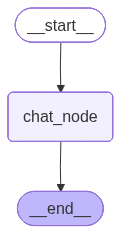

In [61]:
chatbot

In [62]:
initial_state = {
    'message': "Hi, How are you?"
}

final_state = chatbot.invoke(initial_state)

In [72]:
final_state['message'][1]

AIMessage(content='Hi there! I’m here and ready to help with whatever you need. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 287, 'prompt_tokens': 12, 'total_tokens': 299, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CzSIvbWTVyLfS6GTdUrk9lhM7oGGE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bd27b-26f5-7070-982d-194d35ceebd2-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 12, 'output_tokens': 287, 'total_tokens': 299, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 256}})